In [1]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
# MNIST veri setinin Keras kütüphanesi üzerinden yüklenmesi

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [5]:
# Veri Ön İşleme - Adım 1 - Görüntülerin yeniden boyutlandırılması

x_train = x_train.reshape(-1, 28, 28, 1) # -1: Görüntülerin toplam sayısı
x_test = x_test.reshape(-1, 28, 28, 1)

#Veri Ön İşleme - Adım 2 - Görüntülerin normalize edilmesi# -1: Görüntülerin toplam sayısı
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(f"Eğitim (Train) Verilerinin Sayısı ve boyutu = {x_train.shape}")
print(f"Test verilerinin sayısı ve Boyutu = {x_test.shape}")

Eğitim (Train) Verilerinin Sayısı ve boyutu = (60000, 28, 28, 1)
Test verilerinin sayısı ve Boyutu = (10000, 28, 28, 1)


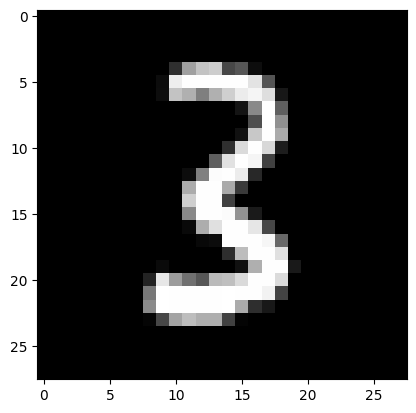

In [7]:
# Çıkış verisi olarak bu gıral görüntülerini hangi rakamı temsil ettiğini gösteren y verilerini düzeliyoruz

plt.imshow(x_train[50000],cmap="gray")

In [9]:
y_train[50000]

3

In [11]:
#One-hot Encoding
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [13]:
y_train[50000]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
#Eğitim verilerinin %20'sinin doğrulama (validation) verisi olarak ayrılması Literatürde Data-split işlemi denilir.
# bu işlem genellikle sklear altındaki train_test_split fonksiyonu ile yapılır

X_train, X_val, y_train_split, y_val = train_test_split(
    x_train, y_train,
    test_size = 0.2, #validasyon verisi yüzde kaç olacak bilgisi burada
    random_state = 42, # rastgelelik işlemini biraz sınırlı tutuyoruz
    stratify = y_train # rastgele şekilde dağılım yaparken sınıf dengesini korur
    )

In [17]:
#CNN tabanlı yapayzeka modelimizi oluşturuyoruz
model = keras.Sequential([
    #CNN ilk blok
    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape =(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    #CNN ikinci blok
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    #YAPAY SİNİR AĞI TANIMLIYORUZ
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax')
])

In [19]:
#Modeli derliyoruz

model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [21]:
model_checkpoint = keras.callbacks.ModelCheckpoint(
    'mnist_classifiction_cnn_model_h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [23]:
#Modelimizi eğitiyoruz(.fit fonksiyonu ile)

history = model.fit(X_train, y_train_split, validation_data=(X_val, y_val),
                  batch_size=128, epochs=10,  callbacks=model_checkpoint)

Epoch 1/10
375/375 [==============================] - ETA: 0s - loss: 0.2013 - accuracy: 0.9396
Epoch 1: val_accuracy improved from -inf to 0.15367, saving model to mnist_classifiction_cnn_model_h5


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


375/375 [==============================] - 66s 173ms/step - loss: 0.2013 - accuracy: 0.9396 - val_loss: 5.5589 - val_accuracy: 0.1537
Epoch 2/10
375/375 [==============================] - ETA: 0s - loss: 0.0667 - accuracy: 0.9790
Epoch 2: val_accuracy improved from 0.15367 to 0.98433, saving model to mnist_classifiction_cnn_model_h5


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


375/375 [==============================] - 64s 170ms/step - loss: 0.0667 - accuracy: 0.9790 - val_loss: 0.0493 - val_accuracy: 0.9843
Epoch 3/10
375/375 [==============================] - ETA: 0s - loss: 0.0488 - accuracy: 0.9846
Epoch 3: val_accuracy improved from 0.98433 to 0.98842, saving model to mnist_classifiction_cnn_model_h5


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


375/375 [==============================] - 66s 176ms/step - loss: 0.0488 - accuracy: 0.9846 - val_loss: 0.0363 - val_accuracy: 0.9884
Epoch 4/10
375/375 [==============================] - ETA: 0s - loss: 0.0399 - accuracy: 0.9871
Epoch 4: val_accuracy improved from 0.98842 to 0.99108, saving model to mnist_classifiction_cnn_model_h5


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


375/375 [==============================] - 63s 168ms/step - loss: 0.0399 - accuracy: 0.9871 - val_loss: 0.0288 - val_accuracy: 0.9911
Epoch 5/10
375/375 [==============================] - ETA: 0s - loss: 0.0340 - accuracy: 0.9890
Epoch 5: val_accuracy improved from 0.99108 to 0.99158, saving model to mnist_classifiction_cnn_model_h5


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


375/375 [==============================] - 60s 159ms/step - loss: 0.0340 - accuracy: 0.9890 - val_loss: 0.0299 - val_accuracy: 0.9916
Epoch 6/10
375/375 [==============================] - ETA: 0s - loss: 0.0311 - accuracy: 0.9900
Epoch 6: val_accuracy improved from 0.99158 to 0.99192, saving model to mnist_classifiction_cnn_model_h5


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


375/375 [==============================] - 95s 255ms/step - loss: 0.0311 - accuracy: 0.9900 - val_loss: 0.0287 - val_accuracy: 0.9919
Epoch 7/10
375/375 [==============================] - ETA: 0s - loss: 0.0275 - accuracy: 0.9912
Epoch 7: val_accuracy improved from 0.99192 to 0.99275, saving model to mnist_classifiction_cnn_model_h5


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


375/375 [==============================] - 103s 274ms/step - loss: 0.0275 - accuracy: 0.9912 - val_loss: 0.0241 - val_accuracy: 0.9927
Epoch 8/10
375/375 [==============================] - ETA: 0s - loss: 0.0268 - accuracy: 0.9911
Epoch 8: val_accuracy did not improve from 0.99275
375/375 [==============================] - 97s 260ms/step - loss: 0.0268 - accuracy: 0.9911 - val_loss: 0.0247 - val_accuracy: 0.9925
Epoch 9/10
375/375 [==============================] - ETA: 0s - loss: 0.0253 - accuracy: 0.9915
Epoch 9: val_accuracy improved from 0.99275 to 0.99283, saving model to mnist_classifiction_cnn_model_h5


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


375/375 [==============================] - 104s 277ms/step - loss: 0.0253 - accuracy: 0.9915 - val_loss: 0.0297 - val_accuracy: 0.9928
Epoch 10/10
375/375 [==============================] - ETA: 0s - loss: 0.0218 - accuracy: 0.9930
Epoch 10: val_accuracy improved from 0.99283 to 0.99333, saving model to mnist_classifiction_cnn_model_h5


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


INFO:tensorflow:Assets written to: mnist_classifiction_cnn_model_h5\assets


375/375 [==============================] - 100s 268ms/step - loss: 0.0218 - accuracy: 0.9930 - val_loss: 0.0241 - val_accuracy: 0.9933


In [25]:
print("Test işlemi için değerşnedirme yapılıyor")

test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Modelin Loss performansı = {test_loss}")
print(f"Modelin Accuracy (Doğruluk Başarısı) Performansı = {test_accuracy}")

Test işlemi için değerşnedirme yapılıyor
313/313 [==============================] - 8s 26ms/step - loss: 0.0183 - accuracy: 0.9933
Modelin Loss performansı = 0.018258394673466682
Modelin Accuracy (Doğruluk Başarısı) Performansı = 0.9933000206947327
